# Project: Investigate the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMDB movie dataset contains information about 10,000 movies collected from The Movie Database (TMDB). Containing data on the plot, cast, crew, budget, user ratings and revenues of several films, this dataset will be analysed to answer relative questions which include:

> * Top 10 movies with the highest and lowest revenue.
> * Top 10 movies with the highest and lowest budget.
> * Top 10 movies with the highest and lowest profit.
> * Do movies with higher budgets generate higher revenues?
> * What year generated the most revenue?
> * What year generated the most profit?
> * Are movies with higher vote average more popular?
> * Are movies with longer runtime more popular?
> * Does popularity influence revenue and profit generated per movie?

In [1]:
# Importing all packages to be used during analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> In this section, data is loaded, observed to check for cleanliness, trimmed and cleaned for analysis.

### General Properties

In [2]:
# Load data, print first 5 rows and inspect data
tm = pd.read_csv('tmdb_movies.csv')
tm.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Checking for the last few rows
tm.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# Checking for non-null values per column
tm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Checking the number of rows with 0 budget
bd = tm.query('budget == 0')
bd.shape

(5696, 21)

In [6]:
# Checking the number of rows with 0 revenue
rv = tm.query('revenue == 0')
rv.shape

(6016, 21)

In [7]:
# Checking for the datatype of the release_date column
type(tm['release_date'][0])

str

In [8]:
# Checking for the total sum of null values per column
tm.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Checking for the number of unique values per column
tm.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Checking the descriptive statistics of dataset
tm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> ### Descriptive Statistics

> * It can be observed that most movies were without budgets and didnt generate revenue.
> * Majority of movies were released betweeon 2006 and 2011.
> * The runtime for most movies fall between 99 minutes and 111 minutes.
> * The highest runtime is 900 minutes which is equivalent to 15 hours. 
> * The vote average for most movies fall between 6.0 and 6.6



In [11]:
# Checking for datatypes of data contained in each column 
tm.dtypes

# revenue, budget, runtime, vote_count, release_year columns contain integers.
# popularity, vote_average, budjet_adj, revenue_adj columns contain floats.

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [12]:
# Checking for the data type of the release_date column
type(tm['release_date'][0])

str

In [13]:
# Checking for duplicate rows

sum(tm.duplicated())

1

> ## Observations 
> * Data contained in the cast, genre and production_companies contain more than one entry seperated by *|* sign.
> * Some rows contain 0 for the budget, revenue, budget_adj and revenue_adj columns.
> * The currency for the budget, revenue, budget_adj and revenue_adj columns is not given. The currency will be assumed to be US dollar for the purpose of this project.
> * The rate of runtime is not given. The unit will be asssumed to be minutes for the purpose of this project
> * Although there are no null values in the budget and revenue column, some movies have no allocated budget and didnt generate revenue.
> * The dataset contains 21 columns and 10866 rows. Some  columns which are not relevant to the analysis can be dropped.
> * The release_data column has a datatype of string.
> * It is observed that 9 columns contain rows with null values. Homepage column having the highest number of rows with null values.
> * The dataset contains a duplicate row.

### Data Cleaning (Eliminating unwanted data & trimming of dataset)

> #### Cleaning steps

> * Columns irrelevant to the analysis will be removed.
> * Duplicate row will be removed.
> * Movies with 0 budget and revenue will be removed so as to improve the accuracy of our analysis.
> * The release_date column will be converted to datetime object. 


In [14]:
# Dropping unwanted columns
tm.drop(['imdb_id', 'homepage', 'overview', 'tagline', 'budget_adj', 'revenue_adj', 'keywords'], axis =1, inplace = True)

# Checking the shape of the dataset after removing columns
tm.shape

(10866, 14)

In [15]:
# Dropping duplicate row
tm.drop_duplicates(inplace = True)

In [16]:
# Converting the release_date column to datetime
import datetime as dt
tm['release_date'] = pd.to_datetime(tm['release_date'], format = "%m/%d/%y")

In [17]:
# Confirming that release_date column has been changed to datetime
tm.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

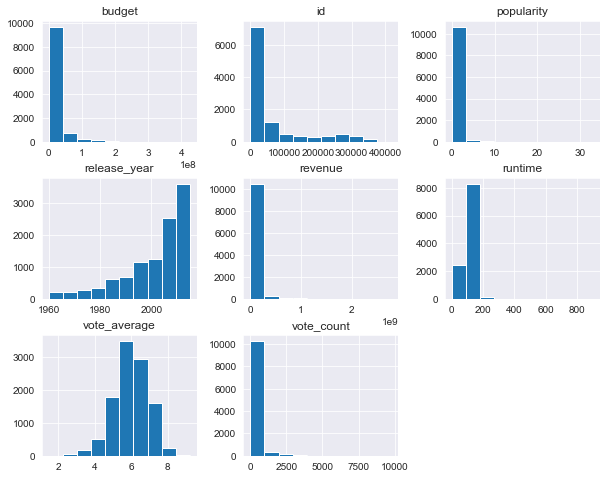

In [18]:
# Viewing the histogram plot of the dataset including rows with zero budget and revenue
tm.hist(figsize = (10, 8));

In [19]:
# Removing rows containing movies with 0 budget
tm = tm.query('budget != 0')
tm.shape

(5169, 14)

In [20]:
# Removing rows containing movies with 0 revenue
tm = tm.query('revenue != 0')
tm.shape

(3854, 14)

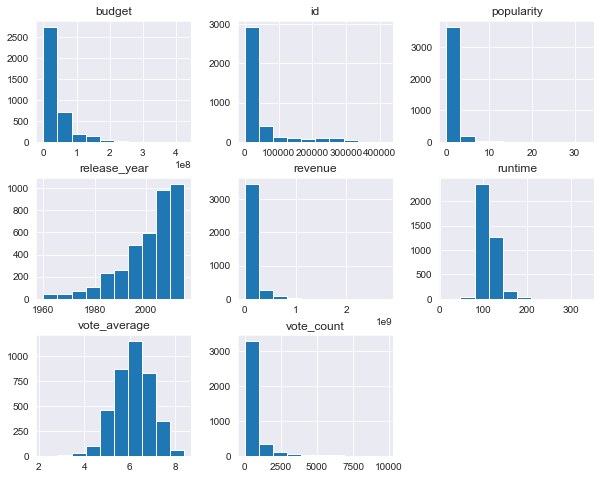

In [21]:
# Viewing the histogram plot of the cleaned data after removing rows with 0 budget and revenue
tm.hist(figsize = (10, 8));

In [22]:
tm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


> * Dropping the rows with zero budget and revenue drastically reduced the size of the dataset but improving the accuracy of the data. This can be observed by comparing the change in both histograms plotted above.
> * In the descriptive statiatics, there are accurate values to account for the min, 25%, 50% and 75% values of the budget and revenue column.


<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

> After data cleaning and wrangling, the dataset is explored using statistics and visualisations to show dependencies and correlation between variables. 

## Questions
> * Top 10 movies with the highest and lowest revenue.
> * Top 10 movies with the highest and lowest budget.
> * Top 10 movies with the highest and lowest profit.
> * Do movies with higher budgets generate higher revenues?
> * What year generated the most revenue?
> * What year generated the most profit?
> * Are movies with higher vote average more popular?
> * Are movies with longer runtime more popular?
> * Does popularity influence revenue and profit generated per movie?

### QUESTION 1: Top 10 Movies with the highest and lowest revenue

In [23]:
# Creating a function to groupby a column,
# calculate the mean agregate of another column to be used as a measure of the first 
# and sort to get the highest 10 and lowest 10 rows

# Defining the function to take in 3 parameters: the dataframe and 2 columns
def mean_agg(dataframe, col1, col2):
    per_average = dataframe.groupby(col1)[col2].mean()
    
     # Sorting by descending order and selecting the highest 10 
    highest_10 = per_average.sort_values(ascending = False)[:10]
    
    # Sorting by descending order and selecting the lowest 10
    lowest_10 = per_average.sort_values()[:10]
    return highest_10, lowest_10

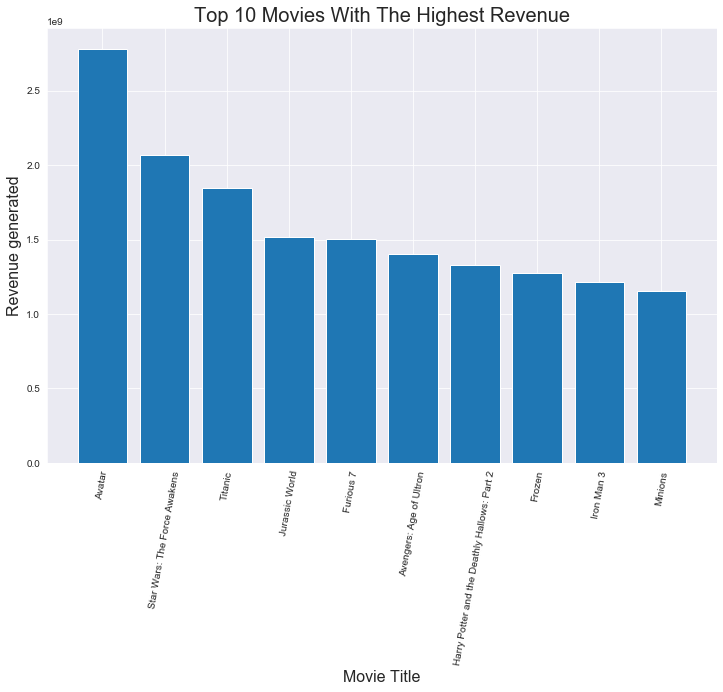

In [24]:
# Applying the mean_agg function to get the average revenue per movie
rev = mean_agg(tm, 'original_title', 'revenue')

# Re-assigning movies with the highest_10 revenues to a variable
high_rev1_10 = rev[0]

# Plotting a bar chart showing the movies with the highest revenue
plt.subplots(figsize = (12,8))
plt.bar(high_rev1_10.index, high_rev1_10)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Movies With The Highest Revenue', fontsize=20)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Revenue generated', fontsize=16)
plt.xticks(fontsize=10, rotation =80)
plt.yticks(fontsize=10);

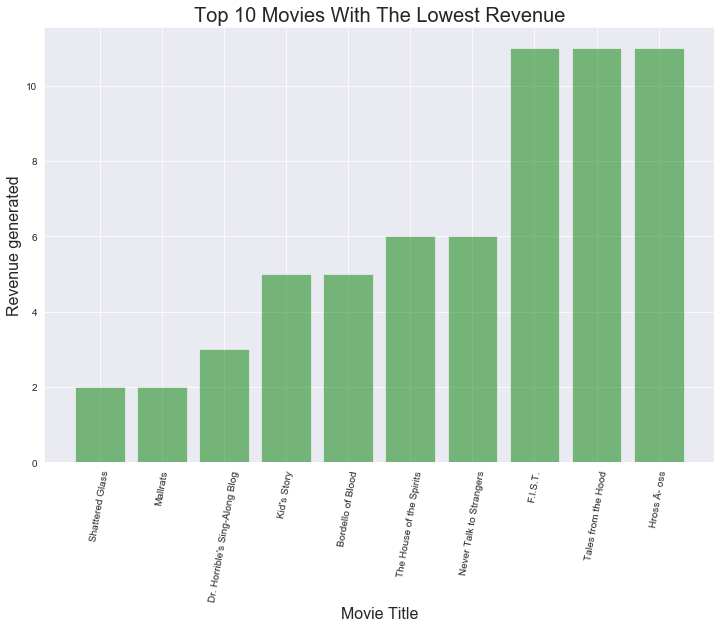

In [25]:
# Re-assigning movies with the lowest_10 revenues to a variable
low_rev_10 = rev[1]
 
# Plotting a bar chart showing the movies with the lowest revenue
plt.subplots(figsize = (12,8))
plt.bar(low_rev_10.index, low_rev_10, color = 'g', alpha = .5)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Movies With The Lowest Revenue', fontsize=20)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Revenue generated', fontsize=16)
plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize=10);

### QUESTION 2: Top 10 movies with the highets and lowest budget.

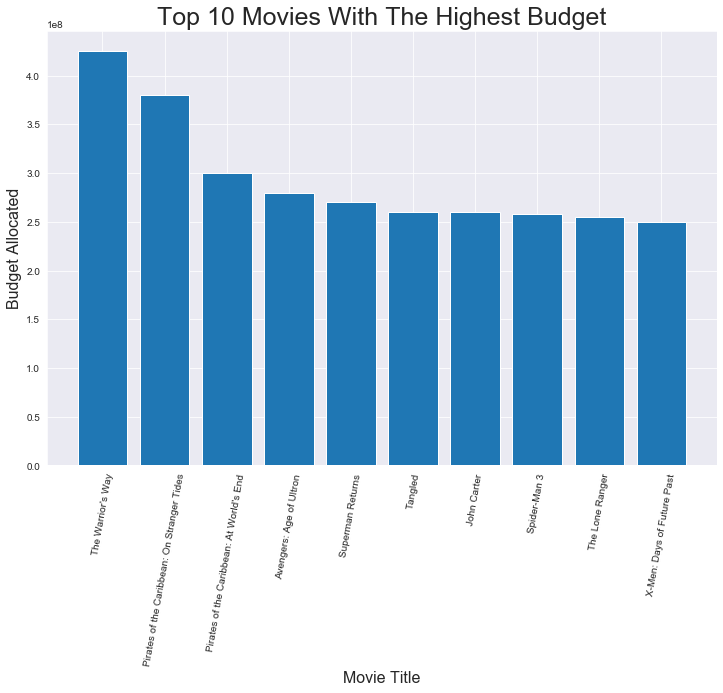

In [26]:
# Applying the mean_agg function to get the average budget per movie
bud = mean_agg(tm, 'original_title', 'budget')

# Re-assigning movies with the highest_10 budgets to a variable
high_bud_10 = bud[0]

# Plotting a bar chart showing the movies with the highest budgets
plt.subplots(figsize = (12, 8))
plt.bar(high_bud_10.index, high_bud_10)

# Defining the plot title, labels anf fontsize of both axis
plt.title('Top 10 Movies With The Highest Budget', fontsize=25)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Budget Allocated', fontsize=16)
plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize=10);

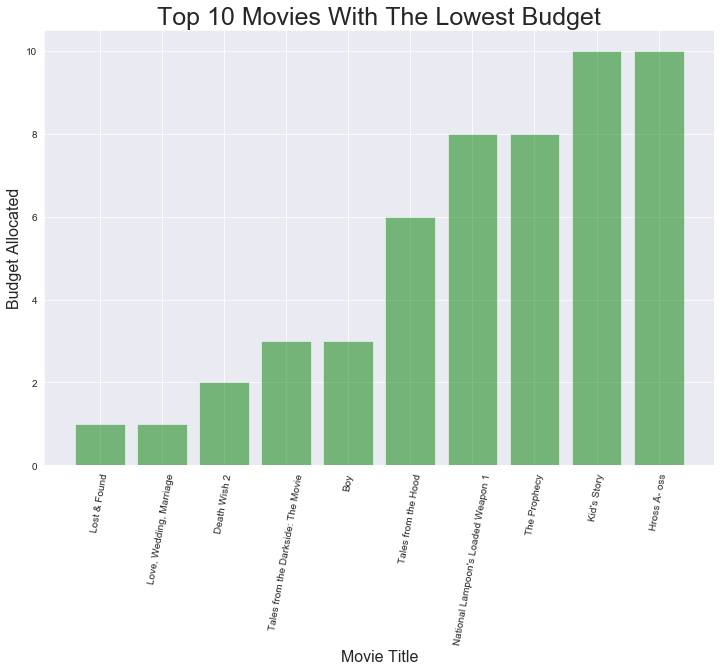

In [27]:
# Re-assigning movies with the lowest_10 budgets to a variable
low_bud_10 = bud[1]

# Plotting a bar chart showing the movies with highest budgets
plt.subplots(figsize = (12, 8))
plt.bar(low_bud_10.index, low_bud_10,  color = 'g', alpha = .5)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Movies With The Lowest Budget', fontsize=25)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Budget Allocated', fontsize=16)
plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize=10);

### QUESTION 3: Top 10 movies with the highest and lowest profits.

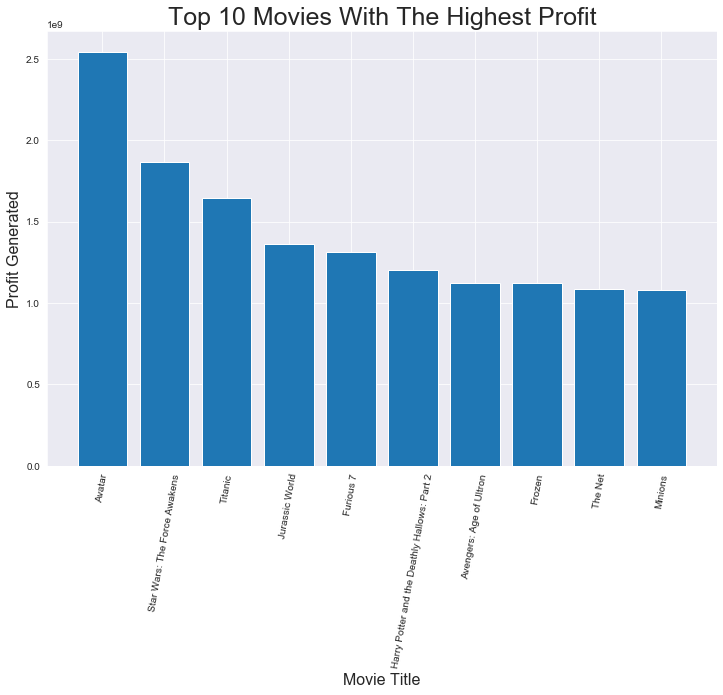

In [28]:
# Calculating the profit generated per movie
profit = tm['revenue'] - tm['budget']

# Creating a new column named Profit containing profit generated per movie and appending it to our original dataframe
tm['profit'] = profit

# Applying the mean_agg function to get the average profit per movie
prof = mean_agg(tm, 'original_title', 'profit')

# Re-assigning movies with the highest_10 profits to a variable
high_prof_10 = prof[0]

# Plotting a bar chart showing the movies with the highest profits
plt.subplots(figsize = (12, 8))
plt.bar(high_prof_10.index, high_prof_10)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Movies With The Highest Profit', fontsize=25)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Profit Generated', fontsize=16)
plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize=10);

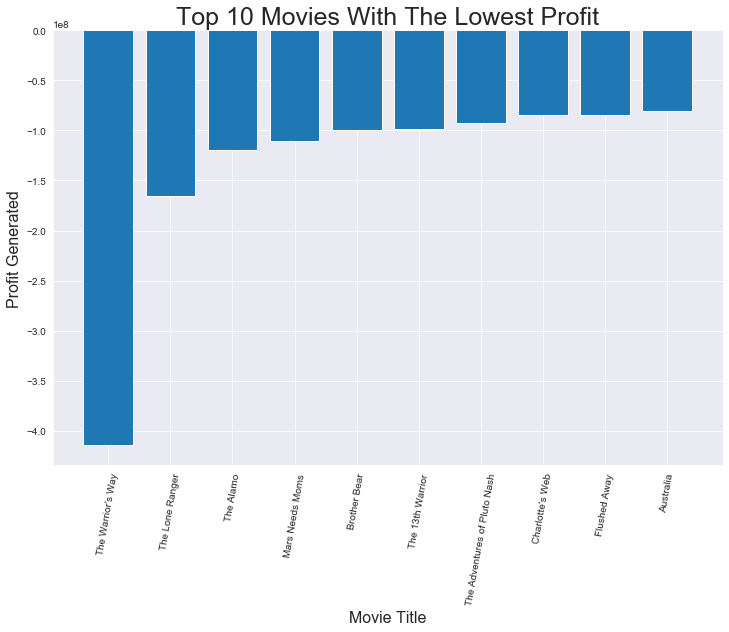

In [29]:
# Re-assigning movies with the lowest_10 profit to a variable
low_prof_10 = prof[1]

# Plotting a bar chart showing the movies with the lowest profit
plt.subplots(figsize = (12, 8))
plt.bar(low_prof_10.index, low_prof_10)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Movies With The Lowest Profit', fontsize=25)
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('Profit Generated', fontsize=16)
plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize=10);

### QUESTION 4: Do movies with the higher budgets generate higher revenue?

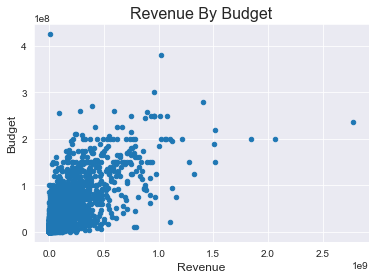

In [30]:
# Plotting a scatter plot to see the correlation between the revenue and budget column
tm.plot(x= 'revenue', y ='budget', kind ='scatter')
plt.title('Revenue By Budget', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Budget', fontsize=12);

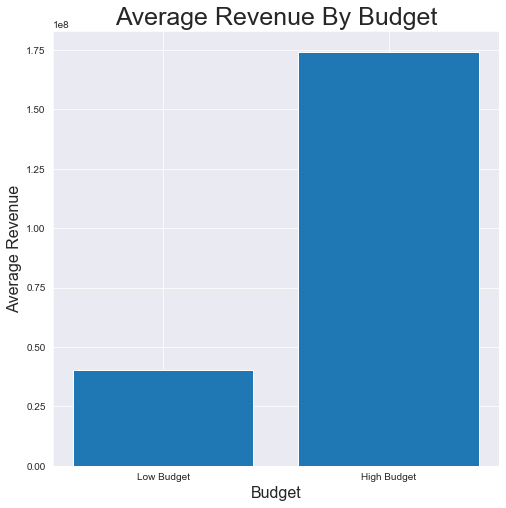

In [31]:
# Calculating the median of the budget column
median = tm['budget'].median()

# Using the median as a means of measurement to create two seperate dataframes containing low and high budget movies.
low = tm.query('budget < {}'.format(median))
high = tm.query('budget >= {}'.format(median))

# Accumulating the average revenue of low and high budget movies
mean_low = low['revenue'].mean()
mean_high = high['revenue'].mean()

# Plotting a bar chart showing the total average revenue generated by low and high budget movies
locations = [1,2]
heights = [mean_low, mean_high]
labels = ['Low Budget','High Budget']
plt.subplots(figsize =(8,8))
plt.bar(locations,heights, tick_label =labels)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Revenue By Budget', fontsize=25)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Average Revenue', fontsize=16);

> * From the scatter plot, there exists a positive correlation between the revenue and budget column.
> * Movies with very high budgets are few.
> * Althought this correlation does not equal causation, movies with more budget seem to generate more revenue.
> * From the bar chart above the average revenue generated by movies with high budgets is more than that of movies with low budgets.


### QUESTION 5: What year generated the most revenue?

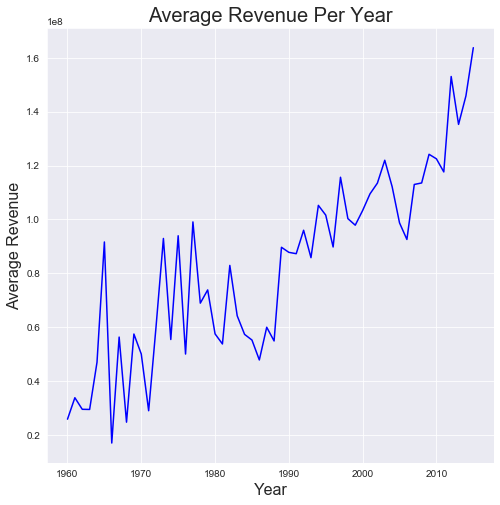

In [32]:
# Grouping by average revenue per year
year_r = tm.groupby('release_year').revenue.mean()

# Plotting a line chart showing the revenue trend across years
plt.subplots(figsize = (8,8))
plt.plot(year_r, color='b')

# Defining the plot title, labels and fontsizes of both axis
plt.title('Average Revenue Per Year', fontsize = 20)
plt.xlabel('Year', fontsize =16)
plt.ylabel('Average Revenue', fontsize = 16);

### QUESTION 6: What year generated the most profit?


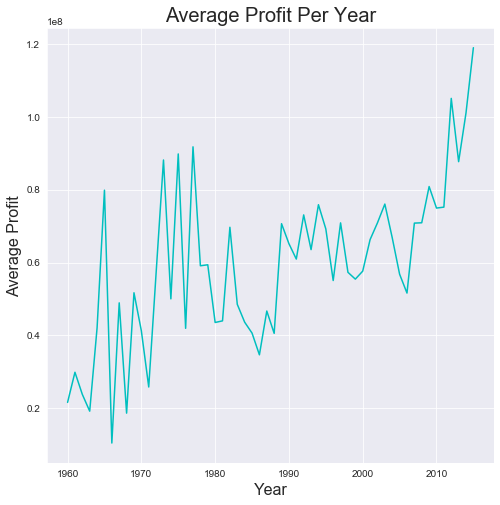

In [33]:
# Grouping by average profit per year 
year_p = tm.groupby('release_year').profit.mean()

# Plotting a line chart showing the profit trend across years
plt.subplots(figsize = (8,8))
plt.plot(year_p, color='c')

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Profit Per Year', fontsize = 20)
plt.xlabel('Year', fontsize =16)
plt.ylabel('Average Profit', fontsize = 16);

> * From the line charts plotted above, movies produced from the year 2000 - 2015 generate more revenue.
> * The revenue generated per year continuously increases from the year 2000.

### QUESTION 7: Are movies with higher vote average more popular?

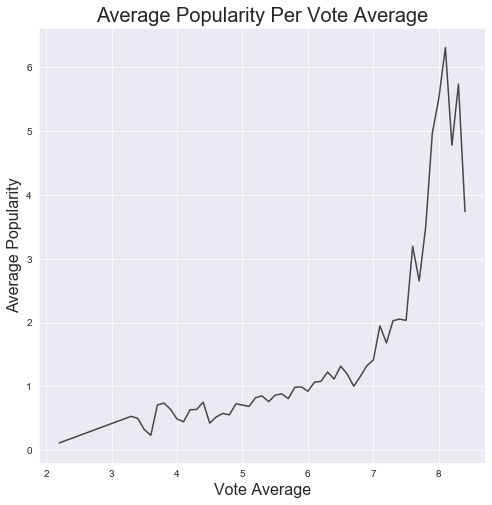

In [34]:
vote_ave = tm.groupby('vote_average').popularity.mean()

# Plotting a line chart showing the average popularity per vote_average
plt.subplots(figsize = (8,8))
plt.plot(vote_ave, color='k', alpha=.7)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Popularity Per Vote Average', fontsize = 20)
plt.xlabel('Vote Average', fontsize =16)
plt.ylabel('Average Popularity', fontsize = 16);


> * Popularity tends to increase with an increase in the vote average per movie.
> * Movies with a higher vote average are more popular.

### QUESTION 8: Are movies with higher runtime more popular?


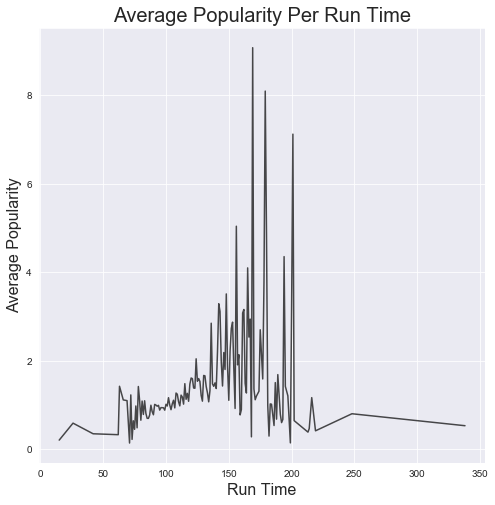

In [35]:
run_time = tm.groupby('runtime').popularity.mean()

# Plotting a line chart showing the average popularity per runtime
plt.subplots(figsize = (8,8))
plt.plot(run_time, color='k', alpha=.7)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Popularity Per Run Time', fontsize = 20)
plt.xlabel('Run Time', fontsize =16)
plt.ylabel('Average Popularity', fontsize = 16);

> * From the line chart above, it can be observed that higher runtimes are infact not very popular.
> * Runtime between 170-200 minutes are the most popular.

### QUESTION 9: Does popularity influence revenue and profit generated?

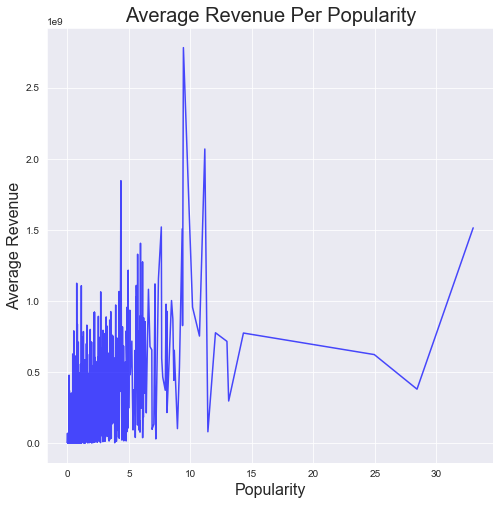

In [36]:
# Grouping by average revenue per popularity 
popularity = tm.groupby('popularity').revenue.mean()

# Plotting a line chart showing the average revenue per popularity
plt.subplots(figsize = (8,8))
plt.plot(popularity, color='b', alpha=.7)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Revenue Per Popularity', fontsize = 20)
plt.xlabel('Popularity', fontsize =16)
plt.ylabel('Average Revenue', fontsize = 16);

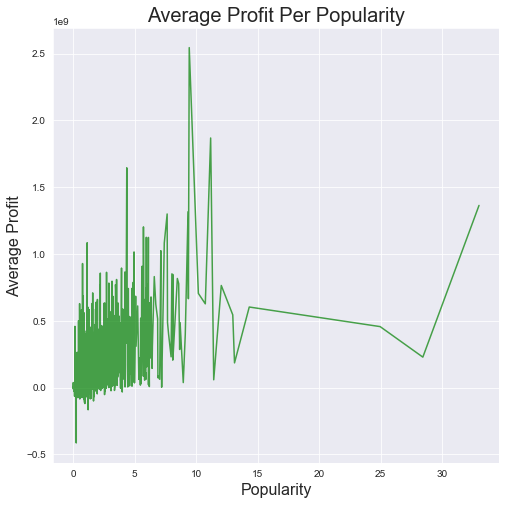

In [37]:
# Grouping by average profit per popularity 
popularity = tm.groupby('popularity').profit.mean()

# Plotting a line chart showing the averageprofit per popularity
plt.subplots(figsize = (8,8))
plt.plot(popularity, color='g', alpha=.7)

# Defining the plot title, labels and fontsize of both axis 
plt.title('Average Profit Per Popularity', fontsize = 20)
plt.xlabel('Popularity', fontsize =16)
plt.ylabel('Average Profit', fontsize = 16);

> From both plots above, an increase in  popularity per movie results in an increase in the revenue and profit generated.

<a id='conclusions'></a>
## Conclusions

> * The movie with the highest generated revenue is `Avatar`.
> * The movie with the lowest generated revenue is `Shattered Glass`.
> * The movie with the highest allocated budget is `The Warrior's Way`.
> * The movie with the lowest allocated budget is `Lost & Found`.
> * The movie with the highest generated profit is `Avatar`.
> * The movie with the lowest generated profit is `The Warrior's Way`.
> * The year with the maximum generated revenue and profit is 2015.
> * Movies with higher budgets tend to have a higher revenue.
> * The revenue and profit generated is higher between 2000 and 2015.
> * The year 2015 generated the highest revenue and profit.
> * Movies with higher vote average are usually more popular.
> * Movies with longer runtime are less popular.
> * An increase in popularity tends to lead to an increase in revenue and profit generated.

> From the comparism of several variables, movies with higher revenue and profit are correlated with high budgets, high popularity, high vote average. Although correlation in this case does not equate to causation, the movies with a combination of these characteristics or more are likely to generate high amount of revenue. 

<a id='conclusions'></a>
    
## References
> Made use of materials from python documentation and stack overflow to understand:
> * How to sort values in pandas dataframe: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
> * axis rotation, font sizes and color for both bar and line plots visualization:
https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html
https://matplotlib.org/3.1.1/tutorials/text/text_intro.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.bar.html
https://stackoverflow.com/questions/58339802/getting-typeerror-unhashable-type-numpy-ndarray-while-trying-to-plot-a-bar-c